## 4.2 損失関数

### 4.2.1 2乗和誤差

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
import numpy as np
# [2]を正解としてみる
t = [0,0,1,0,0,0,0,0,0,0]
# 例1：[2]の正解率が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [7]:
# 例1：[7]の正解率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

### 4.2.2 交差エントロピー誤差

In [12]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [13]:
# [2]を正解としてみる
t = [0,0,1,0,0,0,0,0,0,0]
# 例1：[2]の正解率が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [14]:
# 例1：[7]の正解率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [21]:
a = np.array([[1,2], [3,4], [5, 6]])
a.shape[0]

3

## 4.3 数値微分

### 4.3.1 微分 

In [41]:
# 微分関数の実装
def numerical_diff(f, x):
    h = 10e-4
    return (f(x+h)-f(x-h))/(2*h)

### 4.3.2 数値微分の例

In [42]:
# y=0.01x^2+0.1xを微分する
def function_1(x):
    return 0.01*x**2 + 0.1*x

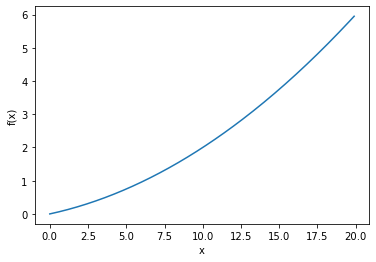

In [43]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [44]:
numerical_diff(function_1, 10)

0.29999999999996696

0.200000000000089


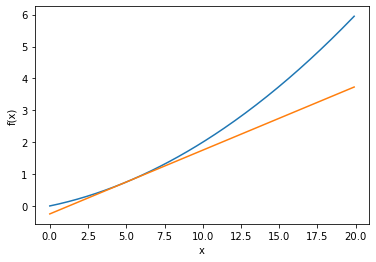

In [52]:
# 接線を描画
import numpy as np
import matplotlib.pylab as plt

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 偏微分

In [71]:
def function_2(x, y):
    return x**2 + y**2

<Figure size 432x288 with 0 Axes>

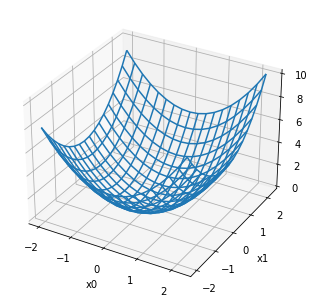

In [72]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
#X = X.flatten()
#Y = Y.flatten()

#grad = numerical_gradient(function_2, np.array([X, Y]).T).T
Z = function_2(X, Y)

plt.figure()
ax = Axes3D(plt.figure())
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.plot_wireframe(X, Y, Z)
#plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
#plt.xlim([-2, 2])
#plt.ylim([-2, 2])
#plt.xlabel('x0')
#plt.ylabel('x1')
#plt.grid()
#plt.draw()
plt.show()

In [73]:
# 偏微分の例題2つ
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

5.999999999998451

In [76]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

8.000000000000895

In [87]:
# 偏微分を同時に計算する
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        #print(grad)
    return grad

In [82]:
def function_2(x):
    return np.sum(x**2)

In [83]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

[6. 0.]
[6. 8.]


array([6., 8.])

### 4.4.1 勾配法

In [88]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [92]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 4.4.2 ニューラルネットワークに対する勾配

In [95]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [97]:
net = simpleNet()
print(net.W)

[[-0.29527177  0.93252339 -0.55026376]
 [ 0.73693299 -0.53830977 -0.81761625]]


In [98]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.48607663  0.07503524 -1.06601288]


In [99]:
t = np.array([0, 0, 1])
net.loss(x, t)

2.180571636687899

In [100]:
def f(W):
    return net.loss(x, t)
# f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.32003992  0.21217351 -0.53221343]
 [ 0.48005989  0.31826026 -0.79832015]]


### 4.5.1 2層ニューラルネットワークのクラス

In [102]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7808666666666667, 0.792
train acc, test acc | 0.8768166666666667, 0.8812
train acc, test acc | 0.8990833333333333, 0.902
train acc, test acc | 0.9079833333333334, 0.9111
train acc, test acc | 0.9129666666666667, 0.9166
train acc, test acc | 0.91805, 0.9211
train acc, test acc | 0.9233, 0.9251
train acc, test acc | 0.9259333333333334, 0.928
train acc, test acc | 0.9301166666666667, 0.9334
train acc, test acc | 0.9325333333333333, 0.9346
train acc, test acc | 0.9352333333333334, 0.9376
train acc, test acc | 0.9376166666666667, 0.9382
train acc, test acc | 0.93965, 0.9403
train acc, test acc | 0.9420833333333334, 0.9424
train acc, test acc | 0.9442, 0.9431
train acc, test acc | 0.9463, 0.946


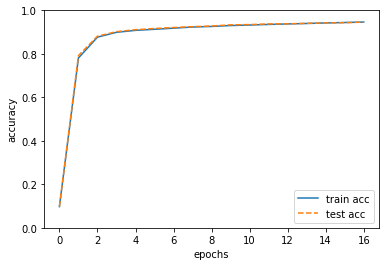

In [104]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

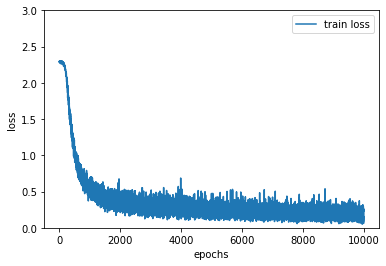

In [111]:
# 損失関数の値を描画してみる
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 3.0)
plt.legend(loc='upper right')
plt.show()